# Script Contents
#### .01 Import Libraries and Data
#### .02 Explore Data Visually
#### .03 Hypothesis
#### .04 Split the data into two sets
#### .05 Split the data into two sets: a training set and a test set
#### .06 Run a linear regression on the data
#### .07 Create a plot that shows the regression line on the test set
#### .08 Check the model performance statistics
#### .09 Compare the predicted y values with the actual y values
#### .10 Include your thoughts on how well the model performed on the test set in a markdown cell
#### .11 Re-test the model after removing outliers

## .01 Import Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Allowing graphs to display in the notebook automatically
%matplotlib inline

In [6]:
# Defining the path
path = r"C:\Users\jacks\Portugese Real Estate Analysis"

In [7]:
# Importing data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'portugal_housing_cleaned.pkl'))

## .02 Explore Data Visually
#### Data has already been cleaned. I plan to remove outliers later in the exercise. 

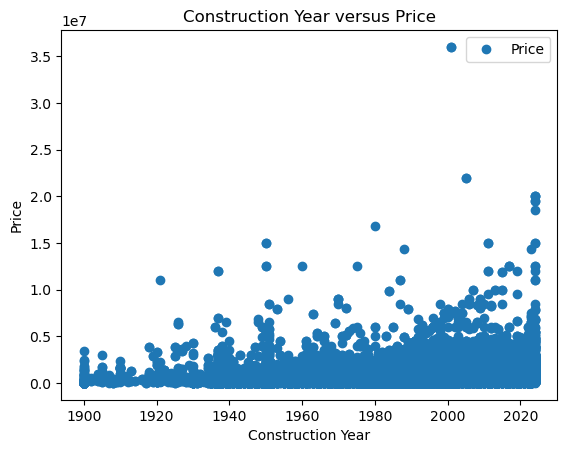

In [9]:
# Create a scatterplot of the price and construction year variables

df.plot(x = 'ConstructionYear', y='Price',style='o')
plt.title('Construction Year versus Price')  
plt.xlabel('Construction Year')  
plt.ylabel('Price')  
plt.show()

#### There appears to be a slight increase in price as construction year increases.

## .03 Hypothesis

#### The more recent the construction year, the higher the price.

## .04 Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [14]:
X = df['ConstructionYear'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

## .05 Split the data into two sets: a training set and a test set.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## .06 Run a linear regression on the data.

In [18]:
# Create a regression object.
regression = LinearRegression()

In [19]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Making sure I have the most up to date version of sklearn installed
sklearn.__version__

'1.5.1'

In [21]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

## .07 Create a plot that shows the regression line on the test set.

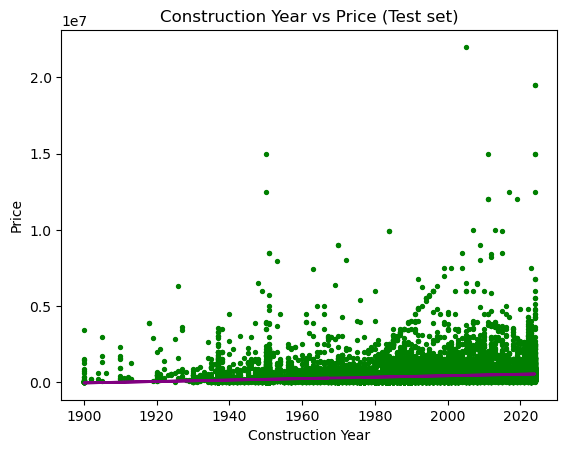

In [38]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 8)
plot_test.plot(X_test, y_predicted, color='purple', linewidth =2)
plot_test.title('Construction Year vs Price (Test set)')
plot_test.xlabel('Construction Year')
plot_test.ylabel('Price')
plot_test.show()

#### There appears to be a very slight positive slope to the regression line. There are so many points concentrated on the lower end of the price spectrum that it is difficult to tell how well the line fits. The line does appear to run through the most concentrated area of points but there are many outlying points far away from the line.

## .08 Check the model performance statistics—MSE and R2 score.

In [42]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [44]:
# Print the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4728.53001304]]
Mean squared error:  405274520352.6522
R2 score:  0.02788129206381862


#### The positive slope does indicate that as construction year increases, so does price. However, the enormous mean squared error indicates there are many points not close to the regression line. Additionally, the R2 score is close to 0 and indicates a very poor fitting regression line. Overall, the variance is not explained well by the regression line and this model is performing poorly.  

## .09 Compare the predicted y values with the actual y values in a dataframe.

In [48]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,58000,317098.832809
1,330000,345470.012887
2,355000,468411.793226
3,411645,388026.783005
4,295000,198885.582483
5,26000,283999.122718
6,179900,525154.153383
7,169900,354927.072913
8,331550,340741.482874
9,470000,425855.023109


## .10 Include your thoughts on how well the model performed on the test set in a markdown cell.

#### The model did not perform well. As previously stated, the mean squared error and R2 score both indicate a poor performing model. Visually, there are many data points far away from the regression line. Comparing the actual price values to the predicted values shows many massive differences. Data bias could come into play when considering the fact that measuring a property's worth based on its construction year is inherently biased. Older construction does not necessarily mean that a property is worth less than a more recently constructed property. Although many people might consider a newly-built house to be of higher value than a house built 40 or 50 years ago, there are plenty of characteristics of older houses that could make it as valuable, if not more valuable, than a new house. 

## .11 Bonus activity: remove outliers and re-test the model. 

In [65]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [67]:
# Print outliers for the Price column
outliers = find_outliers_IQR(df['Price'])

print('number of outliers:' + str(len(outliers)))

print('max outlier value:' + str(outliers.max()))

print('min outlier value:' + str(outliers.min()))

outliers

number of outliers:8192
max outlier value:36000000
min outlier value:863000


5        1485000
6        1500000
12       1700000
16       2950000
57       1000000
          ...   
99352    2900000
99353    3100000
99354     950000
99431    1600000
99464    1500000
Name: Price, Length: 8192, dtype: int64

In [69]:
# Describe the price column
df['Price'].describe()

count    9.947600e+04
mean     3.654558e+05
std      6.453374e+05
min      5.000000e+02
25%      8.500000e+04
50%      2.100000e+05
75%      3.960000e+05
max      3.600000e+07
Name: Price, dtype: float64

In [71]:
# Create a boolean mask to identify non-outlier rows
mask = ~df['Price'].isin(outliers)

# Filter the DataFrame using the mask
df_cleaned = df[mask]

# This code was an AI suggestion

In [73]:
# Checking the cleaned price column 
df_cleaned['Price'].describe()

count     91284.000000
mean     236485.854794
std      195201.040245
min         500.000000
25%       77500.000000
50%      189900.000000
75%      338000.000000
max      862100.000000
Name: Price, dtype: float64

In [75]:
df_cleaned.head()

,Price,District,City,Town,Type,EnergyCertificate,Parking,HasParking,ConstructionYear,TotalArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,NumberOfBathrooms
0,250000,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,1,True,1992,114,2,1,0,114,2
1,9500,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,0,False,1990,27,3,2,0,27,1
2,580000,Faro,Vila do Bispo,Budens,Apartment,D,1,True,2003,84,2,1,0,84,2
3,350000,Faro,Portimão,Portimão,Apartment,C,0,False,1985,68,2,1,0,68,1
4,175000,Faro,Faro,Faro (Sé e São Pedro),House,NC,0,False,1950,78,4,2,0,78,2


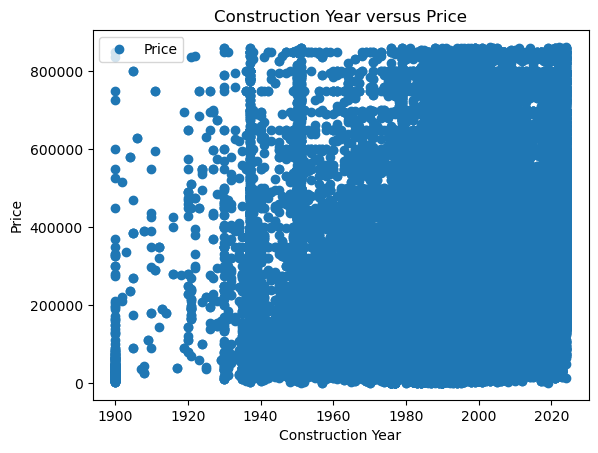

In [77]:
# Create a scatterplot of the price and construction year variables

df_cleaned.plot(x = 'ConstructionYear', y='Price',style='o')
plt.title('Construction Year versus Price')  
plt.xlabel('Construction Year')  
plt.ylabel('Price')  
plt.show()

#### The cleaned price data appears to drastically condense the span of price data. There still appears to be a strong concentration of values in the lower price range of more recent construction years.

In [81]:
# Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable
X = df_cleaned['ConstructionYear'].values.reshape(-1,1)
y = df_cleaned['Price'].values.reshape(-1,1)

In [83]:
# Split the data into two sets: a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [85]:
# Create a regression object.
regression = LinearRegression()

In [87]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [89]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

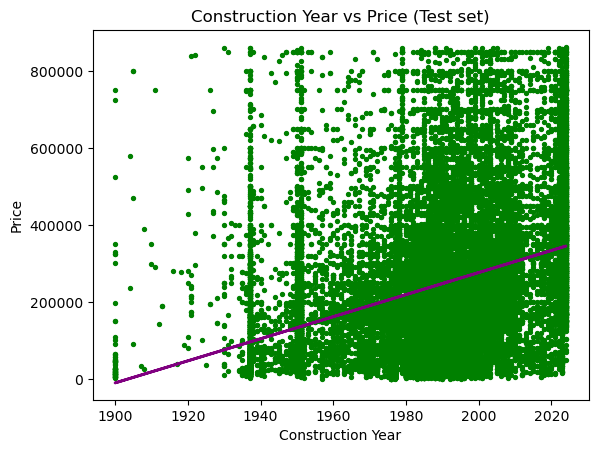

In [91]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 8)
plot_test.plot(X_test, y_predicted, color='purple', linewidth =2)
plot_test.title('Construction Year vs Price (Test set)')
plot_test.xlabel('Construction Year')
plot_test.ylabel('Price')
plot_test.show()

#### There is a clear positive slope to the regression line but there are too many points spread accross the price range for the line to appear to have a strong fit. 

In [95]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [97]:
# Print the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2865.82036591]]
Mean squared error:  34175502199.1135
R2 score:  0.11100105877389432


In [99]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,325000,250592.678801
1,50000,210471.193678
2,235000,239129.397337
3,44000,270653.421362
4,55000,207605.373312
5,175000,127362.403067
6,568988,241995.217703
7,350000,342298.930510
8,799000,216202.834410
9,280000,342298.930510


#### There is not much of an improvement with the model's performance after removing outliers. The R2 score slightly increased but is still extremely low. The actual price values do not match the predicted values. Construction year does not appear to be a strong predictor of price. 